<a href="https://colab.research.google.com/github/SamanZargarzadeh/Deep-Learning/blob/main/16_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) Import

In [1]:
import tensorflow as tf
# check the version
tf.__version__

'2.12.0'

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout, Conv2D, MaxPooling2D 
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.preprocessing import image

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 2) Load Data

In [4]:
fashion_mnist_data = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist_data.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [5]:
print("train X shape: ", X_train.shape) # X_train: numpy array with shape: (num_samples_train, num_features)
print("train y shape: ", y_train.shape) # y_train: numpy array with shape: (num_samples_train,) 
print("test X shape: ", X_test.shape)   # X_test: numpy array with shape: (num_samples_test, num_features)
print("test y shape: ", y_test.shape)   # y_test: numpy array with shape: (num_samples_test,)

train X shape:  (60000, 28, 28)
train y shape:  (60000,)
test X shape:  (10000, 28, 28)
test y shape:  (10000,)


In [6]:
print("minimum train y value: ", min(y_train))
print("maximum train y value: ", max(y_train))

minimum train y value:  0
maximum train y value:  9


In [7]:
# Define the labels

labels = [
    'T-shirt/top', # 0
    'Trouser',     # 1
    'Pullover',    # 2
    'Dress',       # 3
    'Coat',        # 4
    'Sandal',      # 5
    'Shirt',       # 6
    'Sneaker',     # 7
    'Bag',         # 8
    'Ankle boot'   # 9
]

In [8]:
# Rescale the image values so that they lie in between 0 and 1.

X_train = X_train / 255.
X_test = X_test / 255.

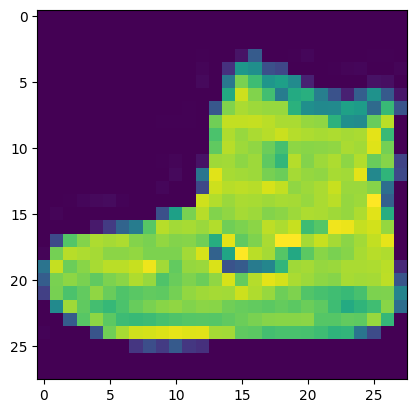

label: Ankle boot


In [9]:
# Display one of the images

i = 0
img = X_train[i, : , :]
plt.imshow(img)
plt.show()
print(f"label: {labels[y_train[i]]}")

# 3) Build a Convolutional Neural Network (CNN) Model

In [10]:
# Build the Sequential convolutional neural network model

# the input layer with input_shape (28, 28, 1). # it is not RGB (just one channel).
# the first hidden layer (conv1), has 16 filters with a shape of 3x3, with a relu activation function.
# the second hidden layer (pool1), is a max pooling layer, with size 3x3
# the third hidden layer, flatten/unroll to a long vector
# the fourth hidden layer, is a fully connected layer, with 64 units, with a relu activation function.
# the output (final) layer is a multi-class with 10 classes (activation function is softmax).

model = Sequential([
                    Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), padding='valid', activation = 'relu', input_shape=(28,28,1)), # note we need 1 in  input_shape=(28,28,1)
                    MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='valid'),
                    Flatten(),
                    Dense(64, activation = 'relu'),
                    Dense(10, activation='softmax')
])

# alternative: write the kernel size or the pool size as a single integer 
# model = Sequential([
#                     Conv2D(filters=16, kernel_size=3, strides=(1,1), padding='valid', activation = 'relu', input_shape=(28,28,1)), 
#                     MaxPooling2D(pool_size=3, strides=(1,1), padding='valid'),
#                     Flatten(),
#                     Dense(10, activation='softmax')
# ])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 16)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 64)                589888    
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 590,698
Trainable params: 590,698
Non-trainable params: 0
__________________________________________________

The first dimension in all the layers has a value of None, and that is because the first dimension will always be the batch size. And the batch size is flexible and we can ignore it for now.

In [12]:
# number of parameters:
# (3x3x1) x 16 = 160
# 24 x 24 x 16 = 9216
# 9216 x 64 + 64 = 589,888 
# 64 x 10 + 10 = 650

# 4) Start Training (Compile)

Compile the model. Use Adam optimizer and change the learning rate to 0.005. For loss, use 'sparse_categorical_crossentropy' and for metrics use 'SparseCategoricalAccuracy'.

In [13]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.005),
    loss = 'sparse_categorical_crossentropy', 
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()] 
)

# 5) Model Fit

Calling model.fit returns a TensorFlow history object. This object contains a record of the progress of the network during training in terms of the loss and the metrics that we defined when we compiled the model.

In [14]:
# fit the model

# history = model.fit(X_train, y_train, epochs = 8, batch_size = 256, verbose = 2)

# This will give us error, can you see why?

In [15]:
X_train.shape

(60000, 28, 28)

In [16]:
X_train[..., np.newaxis].shape

(60000, 28, 28, 1)

You get an error due to the input shape of the train images. This is due to the fact that in the sequential model you specified a channel dimension. To solve it, just set a dummy channel dimension to the training images. After this, you are set to run the fit method.

In [17]:
history = model.fit(X_train[..., np.newaxis] , y_train, epochs = 8, batch_size = 256, verbose = 2)

Epoch 1/8
235/235 - 42s - loss: 0.4519 - sparse_categorical_accuracy: 0.8432 - 42s/epoch - 179ms/step
Epoch 2/8
235/235 - 39s - loss: 0.2795 - sparse_categorical_accuracy: 0.8994 - 39s/epoch - 165ms/step
Epoch 3/8
235/235 - 39s - loss: 0.2378 - sparse_categorical_accuracy: 0.9131 - 39s/epoch - 165ms/step
Epoch 4/8
235/235 - 40s - loss: 0.2113 - sparse_categorical_accuracy: 0.9220 - 40s/epoch - 172ms/step
Epoch 5/8
235/235 - 38s - loss: 0.1996 - sparse_categorical_accuracy: 0.9259 - 38s/epoch - 163ms/step
Epoch 6/8
235/235 - 38s - loss: 0.1854 - sparse_categorical_accuracy: 0.9311 - 38s/epoch - 164ms/step
Epoch 7/8
235/235 - 38s - loss: 0.1661 - sparse_categorical_accuracy: 0.9383 - 38s/epoch - 163ms/step
Epoch 8/8
235/235 - 38s - loss: 0.1532 - sparse_categorical_accuracy: 0.9430 - 38s/epoch - 163ms/step


In [18]:
# Load the history into a pandas Dataframe

df = pd.DataFrame(history.history)

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Loss')]

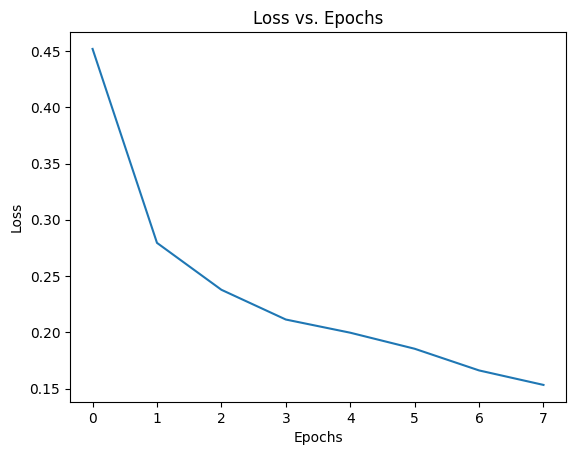

In [19]:
# Make a plot for the loss

loss_plot = df.plot(y="loss", title = "Loss vs. Epochs", legend=False)
loss_plot.set(xlabel="Epochs", ylabel="Loss")

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'sparse_categorical_accuracy')]

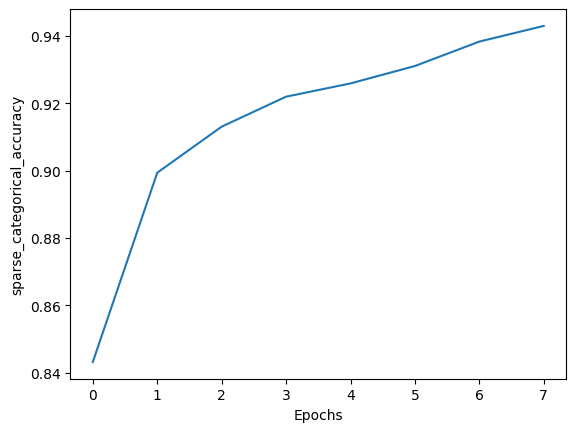

In [20]:
# Make a plot for the accuracy

accuracy_plot = df.plot(y="sparse_categorical_accuracy", legend=False)
accuracy_plot.set(xlabel="Epochs", ylabel="sparse_categorical_accuracy")

# 6) Model Fit with Validation Sets

In [21]:
# fit the model with validation set

history = model.fit(X_train[..., np.newaxis], y_train, epochs = 8, batch_size = 256, verbose = 2, validation_split=0.2) 
# The 0.2 means that 20 percent of the training data will be held back for validation.

Epoch 1/8
188/188 - 33s - loss: 0.1430 - sparse_categorical_accuracy: 0.9465 - val_loss: 0.1549 - val_sparse_categorical_accuracy: 0.9399 - 33s/epoch - 175ms/step
Epoch 2/8
188/188 - 36s - loss: 0.1245 - sparse_categorical_accuracy: 0.9548 - val_loss: 0.1407 - val_sparse_categorical_accuracy: 0.9470 - 36s/epoch - 190ms/step
Epoch 3/8
188/188 - 34s - loss: 0.1180 - sparse_categorical_accuracy: 0.9557 - val_loss: 0.1819 - val_sparse_categorical_accuracy: 0.9293 - 34s/epoch - 182ms/step
Epoch 4/8
188/188 - 32s - loss: 0.1080 - sparse_categorical_accuracy: 0.9600 - val_loss: 0.1899 - val_sparse_categorical_accuracy: 0.9280 - 32s/epoch - 171ms/step
Epoch 5/8
188/188 - 36s - loss: 0.1006 - sparse_categorical_accuracy: 0.9624 - val_loss: 0.2011 - val_sparse_categorical_accuracy: 0.9260 - 36s/epoch - 190ms/step
Epoch 6/8
188/188 - 33s - loss: 0.0887 - sparse_categorical_accuracy: 0.9669 - val_loss: 0.1886 - val_sparse_categorical_accuracy: 0.9351 - 33s/epoch - 177ms/step
Epoch 7/8
188/188 - 34

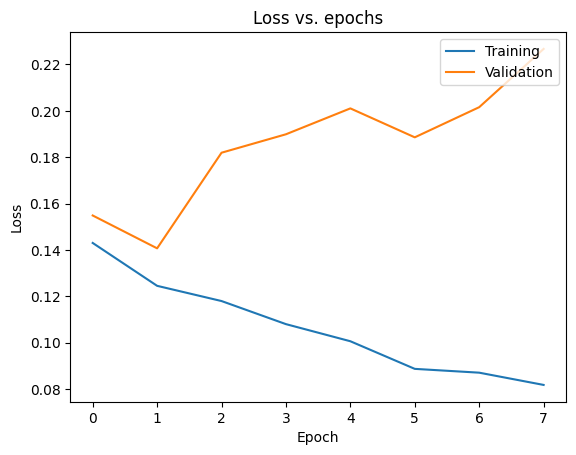

In [22]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

# 7) Reduce Overfitting

In [23]:
model = Sequential([
                    Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), padding='valid', activation = 'relu', input_shape=(28,28,1)), # note we need 1 in  input_shape=(28,28,1)
                    MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='valid'),
                    Flatten(),
                    BatchNormalization(),
                    Dropout(0.5),
                    Dense(64, activation = 'relu'),
                    BatchNormalization(),
                    Dropout(0.5),
                    Dense(10, activation='softmax')
])

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 24, 24, 16)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 9216)              0         
                                                                 
 batch_normalization (BatchN  (None, 9216)             36864     
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 9216)              0         
                                                                 
 dense_2 (Dense)             (None, 64)               

In [25]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.005),
    loss = 'sparse_categorical_crossentropy', 
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()] 
)

In [26]:
# fit the model with validation set

history = model.fit(X_train[..., np.newaxis], y_train, epochs = 8, batch_size = 256, verbose = 2, validation_split=0.2) 

Epoch 1/8
188/188 - 53s - loss: 0.5285 - sparse_categorical_accuracy: 0.8180 - val_loss: 1.2466 - val_sparse_categorical_accuracy: 0.7297 - 53s/epoch - 280ms/step
Epoch 2/8
188/188 - 49s - loss: 0.3557 - sparse_categorical_accuracy: 0.8734 - val_loss: 0.4423 - val_sparse_categorical_accuracy: 0.8851 - 49s/epoch - 260ms/step
Epoch 3/8
188/188 - 49s - loss: 0.3209 - sparse_categorical_accuracy: 0.8856 - val_loss: 0.3229 - val_sparse_categorical_accuracy: 0.8794 - 49s/epoch - 260ms/step
Epoch 4/8
188/188 - 49s - loss: 0.3017 - sparse_categorical_accuracy: 0.8905 - val_loss: 0.2650 - val_sparse_categorical_accuracy: 0.9000 - 49s/epoch - 259ms/step
Epoch 5/8
188/188 - 47s - loss: 0.2878 - sparse_categorical_accuracy: 0.8956 - val_loss: 0.2705 - val_sparse_categorical_accuracy: 0.9019 - 47s/epoch - 252ms/step
Epoch 6/8
188/188 - 48s - loss: 0.2759 - sparse_categorical_accuracy: 0.9000 - val_loss: 0.2643 - val_sparse_categorical_accuracy: 0.9051 - 48s/epoch - 253ms/step
Epoch 7/8
188/188 - 50

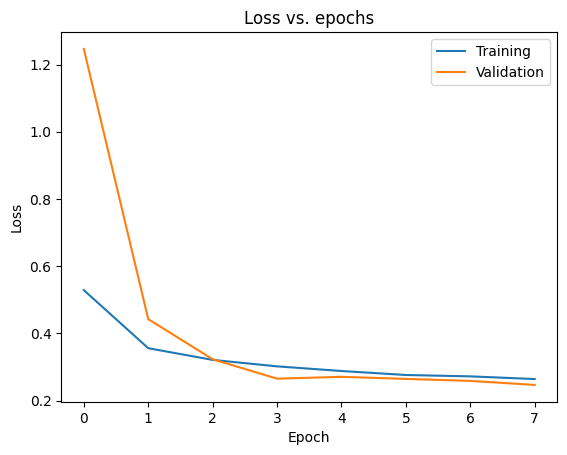

In [27]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

# 8) Model Evaluate on Test

In [28]:
test_loss, test_accuracy = model.evaluate(X_test[..., np.newaxis], y_test)

313/313 [==============================] - 2s 8ms/step - loss: 0.2631 - sparse_categorical_accuracy: 0.9073


# 9) Model Predict

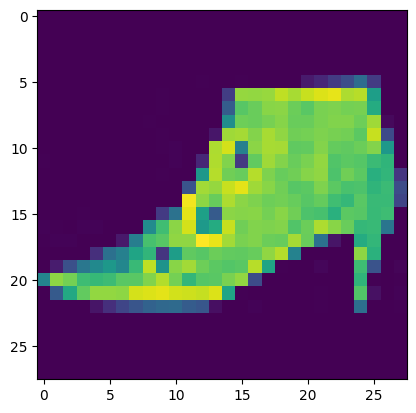

Label: Ankle boot


In [29]:
# Choose a random test image

random_inx = np.random.choice(X_test.shape[0])
X_sample = X_test[random_inx, :]
plt.imshow(X_sample)
plt.show()
print(f"Label: {labels[y_test[random_inx]]}")

In [30]:
# Get the model predictions

model.predict(X_sample[np.newaxis,...,np.newaxis])

1/1 [==============================] - 0s 168ms/step


array([[3.8457134e-07, 9.4166671e-07, 2.8661563e-07, 6.0917898e-07,
        5.9789113e-07, 5.3092286e-02, 1.1160143e-06, 4.7238686e-04,
        1.4710210e-07, 9.4643134e-01]], dtype=float32)

In [31]:
# Get the model prediction label

predictions = model.predict(X_sample[np.newaxis,...,np.newaxis])
print(np.argmax(predictions))
print(f"Model prediction:{labels[np.argmax(predictions)]}")

1/1 [==============================] - 0s 22ms/step
9
Model prediction:Ankle boot
